# E-commerce — Анализ товарного ассортимента

## Введение

В нашем распоряжении данные о транзакциях интернет-магазина товаров для дома "Пока все еще тут". Опираясь на эти данные, мы проведем исследовательский анализ продаж магазина и товарного ассортимента, а так же проверим несколько гипотез, которые возникнут в процессе исследования. 

**Целью** данного исследования будет анализ продаж магазина и товарного ассортимента 
**Задачами** данного исследования являются: 
1) Анализ продаж 
2) Определение товарных категорий 
3) Анализ товарного ассортимента, определение лучших и худших по продажам товаров 
4) Выделить основной и дополнительный ассортимент 
\
**План работы:** \
**1) Введение** \
\
**2) Знакомство с данными** \
\
**3) Предобработка данных** \
    3.1) Изменение типов данных в столбцах \
    3.2) Проверка на количество пропусков \
    3.3) Выявление явных и неявных дубликатов \
    3.4) Анализ аномалий в данных \
    3.5) Добавление столбцов с месяцем и часом заказа\
    \
**4) Основная часть** \
    4.1) Общий анализ продаж магазина \
        *- суммарная выручка* \
        *- количество заказов* \
        *- количество пользователей* \
        *- продажи по месяцам* \
        \
    4.2) Разбитие ассортимента по товарным категориям и их анализ \
        *- по выручке* \
        *- по количеству* \
        \
    4.3) ABC-анализ \
        *- по выручке* \
        *- по количеству* \
    \
    4.4) Выявление десятки лучших и худших товаров\
        *- по выручке* \
        *- по количеству* \
    \
    4.5) Анализ лучших товаров в динамике по месяцам \
    \
    4.6) Анализ числа заказов\
        *- по часам* \
        *- по месяцам* \
    \
    4.7) Проверка гипотез, сформулированных в процессе исследования \
    \
**5) Заключение**

## Знакомство с данными

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Данные содержат 7474 строки \
Колонки в `ecom_dataset_upd.csv` : \
`date` — дата заказа; \
`customer_id` — идентификатор покупателя; \
`order_id` — идентификатор заказа; \
`product` — наименование товара; \
`quantity` — количество товара в заказе; \
`price` — цена товара \
\
Сразу же в глаза бросаются неверные типы данных в столбцах `date` и `price`, а так же то, что в данных отсутствуют пропуски

## Предобработка данных

### Изменение типов данных в столбцах

In [5]:
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H')
data['price'] = data['price'].astype('int')

In [6]:
print(data['date'].min())
print(data['date'].max())

2018-10-01 00:00:00
2020-01-31 15:00:00


Данные распределены по времени от 1 октября 2018 до 31 января 2020 года

### Проверка на количество пропусков

In [7]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропуски в данных отсутствуют

### Выявление явных и неявных дубликатов

In [8]:
data.duplicated().sum()

0

Явные дубликаты в данных отсутствуют. Попробуем поискать неявные дубликаты с помощью столбцов с заказами и товарами. Если в одном заказе куплено несколько штук одного товара, они должны быть в одной строке с увеличением количества.

In [9]:
data[data.duplicated(subset=['product', 'order_id', 'customer_id'], keep=False)].head(30)

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299
80,2018-10-04 09:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409


Мы действительно обнаружили строки, в которых внутри одного заказа встречались дубликаты товаров. Возник вопрос: являются ли эти дубликаты следствием ошибки выгрузки, либо это товары были куплены в некотором количестве, но записаны в разные строки? Взглянув подробнее на некоторые подобные заказы, мы склонны полагать, что это все-таки ошибка выгрузки. Особенно сильно это заметно, например, в строках 140-155 таблицы выше. Мы видим, что в заказ добавлены пластмассовые тазы разного объема, а затем все те же тазы в таком же порядке и количестве задублированы еще раз. От подобных дубликатов мы решаем избавиться

In [10]:
data.drop_duplicates(subset=['order_id', 'product'], keep='first', inplace=True)

Теперь проверим, чтобы в наших данных у каждого заказа был лишь один пользователь

In [11]:
duplicate_orders = data.groupby('order_id')['customer_id'].nunique().reset_index()
multiple_customers = duplicate_orders[duplicate_orders['customer_id'] > 1]
if not multiple_customers.empty:
    print("Есть заказы с несколькими пользователями:")
    print(multiple_customers)
else:
    print("Все заказы относятся только к одному пользователю.")


Есть заказы с несколькими пользователями:
     order_id  customer_id
902     69485            2


Обнаружился один заказ, у которого указано два пользователя. Взглянем на этот заказ подробнее

In [12]:
data.query('order_id == 69485')

,date,customer_id,order_id,product,quantity,price
1282,2018-12-20 16:00:00,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,1087
1292,2018-12-21 11:00:00,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274


С разницей в один день в заказ был добавлен другой товар другим пользователем.

In [13]:
data.query('customer_id == "266beb08-ec9b-43b4-89bb-ac60fa23ffee"')

,date,customer_id,order_id,product,quantity,price
1292,2018-12-21 11:00:00,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274


Поскольку это единственный заказ данного пользователя за все время пользования интернет-магазином, данный заказ выглядит скорее как очень странная ошибка выгрузки данных. Избавимся от него.

In [14]:
data = data.query('customer_id != "266beb08-ec9b-43b4-89bb-ac60fa23ffee"')

### Поиск аномалий

В качестве аномалий постараемся поискать аномально дорогие товары, заказы с аномально большим количеством единоразово купленных товаров, а так же пользователей, сделавших аномально много заказов.

In [15]:
data.sort_values('price', ascending=False).head(15)

,date,customer_id,order_id,product,quantity,price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077
7436,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679
7190,2019-12-31 10:00:00,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,Сумка-тележка хозяйственная Rolser IMX006 bass...,2,7679
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597


Аномально дорогих товаров не обнаружено. В основном самые дорогие товары: сушилки, сумки-тележки, гладильные доски, урны и автоматические щетки

In [16]:
data.sort_values('quantity', ascending=False).head(15)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59
6707,2019-10-28 10:00:00,018fb729-3525-4314-8e4d-1982b1062f9f,73110,"Шпингалет 80 мм белый с пружиной, 1102188",100,44


В большинстве своем это действительно товары, которых покупают по много штук сразу (вешалки, пружины, крючки и т.д.). А вот заказ на тысячу вантузов выглядит весьма странно. Интернет-магазин "Пока все еще тут" вряд ли является оптовым магазином, поэтому сомнительно, что кто-то решил закупить вантузы оптом не у производителя или поставщика, а напрямую из магазина.

In [17]:
data.query('order_id == 71743')

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675


Дополнительно убедившись, что других товаров в данном заказе нет, мы приняли решение удалить данную аномалию

In [18]:
data = data.query('order_id != 71743')

In [19]:
top_users = data.groupby('customer_id',as_index=False)['order_id'].nunique()
top_users.sort_values(by='order_id', ascending=False)

,customer_id,order_id
1897,c971fb21-d54c-4134-938f-16b62ee86d3b,126
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1731,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
...,...,...
984,69c524f1-dd2a-4c4e-a5b0-def54dc96f9e,1
983,69b17a52-a59b-4656-8d47-375e81e7d5f1,1
982,69897438-1f6c-42f3-8876-ec7f0296072d,1
981,6987e6d6-a63a-4ce2-a2d0-f424092d235e,1


Обнаружен пользователь, совершивший 126 уникальных заказов. Посмотрим на все заказы, совершенные этим пользователем

In [20]:
data.query('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"').head(30)

,date,customer_id,order_id,product,quantity,price
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162
64,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86
65,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749
130,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742
131,2018-10-08 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68562,Готовая скатерть Ажурная Dia Rose круглая д.15...,1,712
132,2018-10-08 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68563,Сушилка для белья потолочная Zalger Lift Basic...,1,614
139,2018-10-08 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68568,"Таз пластмассовый 18,0 л квадратный (ТП-18) ""П...",1,254
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"Стяжка оконная с болтом СТ-55 цинк, 1108354",64,19
171,2018-10-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68596,Сумка-тележка 3-х колесная Gimi Tris Floral синяя,1,2699


Взглянув на первые 30 товаров, купленных данным пользователем, мы убедились, что ничего аномального в его поведении нет. Пользователь совершает частые, но не объемные заказы (на 1-2 позиции) абсолютно разных товаров. Ничего подозрительного

### Добавление столбцов

Первым делом мы добавим столбец, который бы показывал не поштучную стоимость товаров, а стоимость за все одинаковые товары в заказе разом. Затем мы добавим стобцы с указанием часа и месяца заказа, что пригодится нам впоследствии.

In [21]:
data['total_price'] = data['price'] * data['quantity']
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour

### Промежуточный итог

In [22]:
print('Изначальный объем данных:', original_data['order_id'].count(), 'строк')
print('Конечный объем данных:', data['order_id'].count(), 'строки')
print('Потеряно строк после предобработки:', original_data['order_id'].count() - data['order_id'].count())
print('Что составляет', ((original_data['order_id'].count() - data['order_id'].count())/original_data['order_id'].count()*100).round(1), '% исходного объема')

Изначальный объем данных: 7474 строк
Конечный объем данных: 5552 строки
Потеряно строк после предобработки: 1922
Что составляет 25.7 % исходного объема


В ходе предобработки данных и избавления от дубликатов и аномалий, мы потеряли 1922 строки (25.7 % изначальных данных). Впрочем, ничего страшного, поскольку мы убедились, что эти строки являются ошибочными задвоениями данных, поэтому качество исследования после их удаления лишь возросло.

## Основная часть

### Общий анализ продаж магазина

In [23]:
print('Общая прибыль интернет-магазина за наблюдаемый период:', data['total_price'].sum(), 'рублей')
print('Количество заказов:', data['order_id'].nunique())
print('Количество пользователей:', data['customer_id'].nunique())
print('Продано товарных номенклатур:', data['product'].count())
print('Продано единиц товара:', data['quantity'].sum())
print('Среднее количество позиций в заказе:', (data['product'].count() / data['order_id'].nunique()).round(2))

Общая прибыль интернет-магазина за наблюдаемый период: 3935335 рублей
Количество заказов: 3520
Количество пользователей: 2429
Продано товарных номенклатур: 5552
Продано единиц товара: 13352
Среднее количество позиций в заказе: 1.58


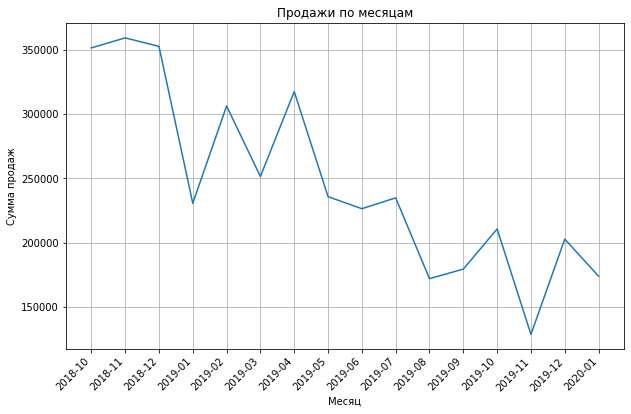

In [24]:
monthly_sales = data.groupby(data['date'].dt.to_period('M'))['total_price'].sum()
monthly_sales.index = monthly_sales.index.astype(str)


plt.plot(monthly_sales.index, monthly_sales.values)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.title('Продажи по месяцам')

plt.show()

На графие отчетливо видно, что продажи интернет-магазина стремительно падают. Взглянем на количество заказов.

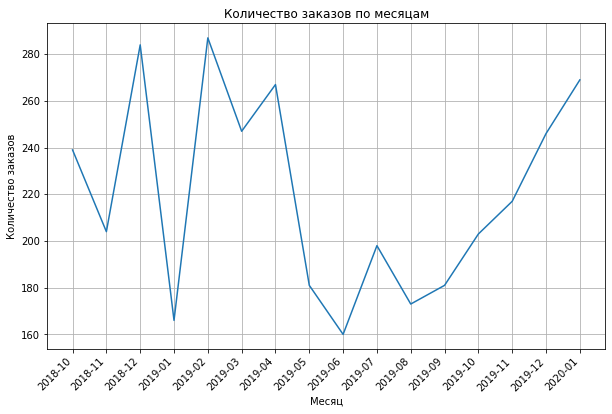

In [25]:
monthly_orders = data.groupby(data['date'].dt.to_period('M'))['order_id'].nunique()
monthly_orders.index = monthly_orders.index.astype(str)


plt.plot(monthly_orders.index, monthly_orders.values)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по месяцам')

plt.show()

При этом количество заказов хоть и уменьшилось летом 2019, однако стремительно растет последние полгода наблюдаемого периода. Если количество заказов растет, а выручка падает, следовательно мы можем сделать вывод, что в интернет-магазине упал средний чек, что в свою очередь может быть следствием неправильного подхода к товарному ассортименту, что нам и предстоит исследовать дальше.

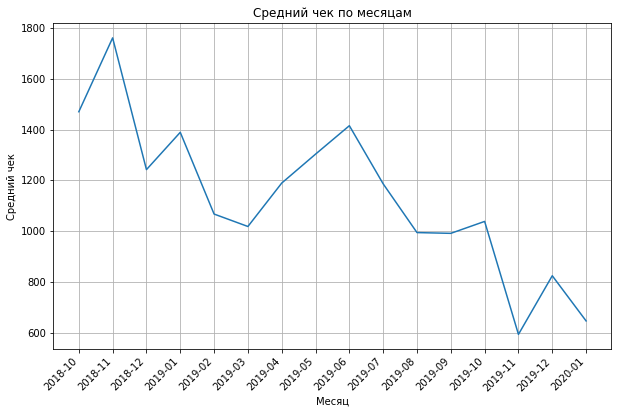

In [26]:
avg_bill_monthly = data.groupby(data['date'].dt.to_period('M')).agg(avg_bill=('total_price', 'sum'), unique_orders=('order_id', 'nunique'))
avg_bill_monthly['avg_bill'] = (avg_bill_monthly['avg_bill'] / avg_bill_monthly['unique_orders']).astype(int)
avg_bill_monthly.drop('unique_orders', axis=1, inplace=True)
avg_bill_monthly.index = avg_bill_monthly.index.astype(str)

plt.plot(avg_bill_monthly.index, avg_bill_monthly.values)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.title('Средний чек по месяцам')

plt.show()

Наша догадка оказалась верна, действительно средний чек интернет магазина падает почти синхронно падению выручки.

### Разбитие ассортимента по товарным категориям и их анализ

In [27]:
data['name'] = data['product'].apply(lambda x: ' '.join(x.split()[:2])).str.lower()

In [28]:
Бытовые_приборы = ['ванна', 'веник', 'весы', 'доска', 'дозатор', 'измерительный', 'кипятильник', 'корыто', 'лестница',
                  'миксер', 'сушил', 'гладил', 'окномойка', 'орехоколка', 'пылесос', 'пьезозажигалка', 'сверло', 'стремянка',
                  'сушилка', 'термометр', 'утюг', 'фен', 'сварка', 'электроштопор']
Хоз_товары = ['антижир', 'антинакипин', 'ароматиз', 'бак', 'бальзам', 'бензин', 'бидон', 'пакет', 'вантуз', 'ведро', 
              'емкость', 'ерш', 'мыло', 'соль', 'паста', 'кисточка', 'кондиционер', 'концентрат', 'корзин', 'короб', 'лопатка',
              'лоток', 'мешок', 'модульная', 'мыльница', 'прищеп', 'ополаскиватель', 'отбеливатель', 'отжим', 'пена', 'перчат',
             'кашпо', 'подрукавник', 'скребок', 'сметка', 'совок', 'средство', 'биопорошок', 'таз', 'тележка', 'тряпк', 'маска',
             'чистящий', 'швабра', 'щетка', 'ящик', 'ёрш', 'сумка']
Интерьер = ['скатерть', 'постельное', 'карниз', 'ковер', 'коврик', 'ковёр', 'комод', 'комплект', 'кофр', 'полотен', 'ковров',
           'наволоч', 'наматра', 'обувница', 'одеяло', 'плед', 'подголовник', 'пододеяльник', 'подушка', 'полк', 'решетка',
           'светильник', 'сиденье', 'стеллаж', 'штора']
Кухонные_приборы = ['tepмокружка', 'банка', 'блюд', 'бульонниц', 'вилка', 'измельчитель', 'картофелемялка', 'кастрюля', 'ковш',
                   'контейнер', 'котел', 'кружка', 'крышк', 'кувшин', 'кухонн', 'ложка', 'масленка', 'стакан', 'сковород',
                   'миска', 'бокал', 'кружек', 'нож', 'посуд', 'столов', 'форм', 'фужер', 'эмалированных', 'овощ', 'отделитель',
                   'половник', 'пресс', 'пробка', 'просеиватель', 'противень', 'рассекатель', 'рыбочистка', 'сахарница', 'сито',
                   'скалка', 'соковарка', 'соковыжималка', 'сотейник', 'тарелка', 'терка', 'термокружка', 'термо', 'толкушка',
                   'тортница', 'форма', 'хлебница', 'чайн']
Декор = ['подставка', 'ваза', 'венчик', 'декор', 'искусственн', 'картина', 'муляж', 'салфет', 'подставка', 'покрывало',
         'простын', 'скатерть', 'ткань', 'урна', 'этажерка', 'ручка']
Вспомогательные_предметы = ['вешал', 'прищеп', 'вкладыши', 'держатель', 'завертка', 'экран', 'кольца', 'крепеж', 'крючок',
                            'халат', 'инструмент', 'махровых', 'прецизионн', 'сверел', 'насадка', 'основание', 'петля',
                            'плечики', 'подарочный', 'подкладка', 'покрытие', 'пружина', 'ролик', 'рукав', 'сетка',
                            'складн', 'блок', 'стяжк', 'уголок', 'фал капроновый', 'фиксатор', 'чехол', 'шило', 'шнур',
                           'шпагат', 'шпингалет', 'шприц', 'штанг']

In [29]:
data['category'] = None  # Создание нового столбца 'category' со значением None

for index, row in data.iterrows():
    product_name = row['name']
    for keyword in Бытовые_приборы:
        if keyword in product_name:
            data.at[index, 'category'] = 'Бытовые приборы'
            break
    for keyword in Хоз_товары:
        if keyword in product_name:
            data.at[index, 'category'] = 'Хоз товары'
            break
    for keyword in Интерьер:
        if keyword in product_name:
            data.at[index, 'category'] = 'Интерьер'
            break
    for keyword in Кухонные_приборы:
        if keyword in product_name:
            data.at[index, 'category'] = 'Кухонные приборы'
            break
    for keyword in Декор:
        if keyword in product_name:
            data.at[index, 'category'] = 'Декор'
            break
    for keyword in Вспомогательные_предметы:
        if keyword in product_name:
            data.at[index, 'category'] = 'Вспомогательные предметы'
            break
    if data.at[index, 'category'] is None:
        data.at[index, 'category'] = 'Растения'

In [30]:
data.drop('name', axis=1, inplace=True)

In [31]:
category_grouped_count = data.groupby('category')['quantity'].sum().sort_values(ascending=False)
category_grouped_sales = data.groupby('category')['total_price'].sum().sort_values(ascending=False)

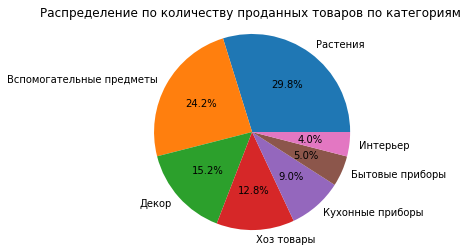

category
Растения                    3978
Вспомогательные предметы    3230
Декор                       2023
Хоз товары                  1714
Кухонные приборы            1197
Бытовые приборы              674
Интерьер                     536
Name: quantity, dtype: int64

In [32]:
categories = category_grouped_count.index
counts = category_grouped_count.values

# Создание круговой диаграммы
plt.pie(counts, labels=categories, autopct='%1.1f%%')

# Настройка аспектов диаграммы
plt.axis('equal')

# Добавление заголовка
plt.title('Распределение по количеству проданных товаров по категориям')

# Отображение диаграммы
plt.show()
display(category_grouped_count)

Самую большую долю по количеству проданных товаров занимают Растения и Вспомогательные предметы (29.8% и 24.2% соответственно). Меньше всего проданных товаров в категориях Интерьер и Бытовые приборы

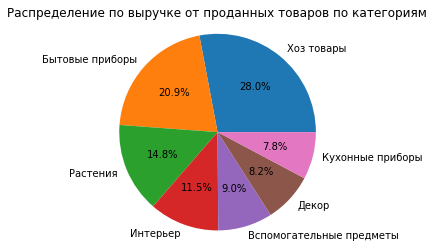

category
Хоз товары                  1100376
Бытовые приборы              821502
Растения                     581725
Интерьер                     452247
Вспомогательные предметы     352646
Декор                        321154
Кухонные приборы             305685
Name: total_price, dtype: int64

In [33]:
categories = category_grouped_sales.index
counts = category_grouped_sales.values

# Создание круговой диаграммы
plt.pie(counts, labels=categories, autopct='%1.1f%%')

# Настройка аспектов диаграммы
plt.axis('equal')

# Добавление заголовка
plt.title('Распределение по выручке от проданных товаров по категориям')

# Отображение диаграммы
plt.show()
display(category_grouped_sales)

Однако после того, как мы взглянули на доли категорий в разбивке по продажам, картина кардинально поменялась. Хоз товары, занимавшие долю в 12.8% по количеству вышли на первое место с долей 28% по продажам, став единственной категорией с долей выручки свыше миллиона рублей. На втором месте Бытовые приборы с долей продаж 20.9% против всего 5% в количественном отношении. Разгадка данного явления заключается в том, что эти товары хоть и малочисленные, но дорогие, так что, к примеру, продажа одного пылесоса эквивалентна продаже сотни растений. 

### ABC-анализ

In [34]:
abc_sales = data.groupby('product', as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)
abc_sales['ratio'] = abc_sales['total_price'] / (abc_sales['total_price'].sum()) * 100
abc_sales['cum_ratio'] = abc_sales['ratio'].cumsum()
abc_sales['group'] = None

for index, row in abc_sales.iterrows():
    cum_ratio = row['cum_ratio']
    if cum_ratio <= 80:
        abc_sales.at[index, 'group'] = 'A'
    elif 80 < cum_ratio <= 95:
        abc_sales.at[index, 'group'] = 'B'
    else:
        abc_sales.at[index, 'group'] = 'C'


In [35]:
abc_sales

,product,total_price,ratio,cum_ratio,group
1193,Простынь вафельная 200х180 см WELLNESS RW180-0...,53232,1.352668,1.352668,A
1617,Сумка-тележка 2-х колесная Gimi Argo синяя,50405,1.280831,2.633499,A
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596,1.260274,3.893773,A
1898,Тележка багажная DELTA ТБР-22 синий грузоподъе...,33992,0.863764,4.757537,A
835,Муляж ЯБЛОКО 9 см красное,32702,0.830984,5.588520,A
...,...,...,...,...,...
1058,Петрушка Итальянский гигант 2 г 4660010776553,10,0.000254,99.999009,C
2065,"Цинния Оранжевый король 0,5 г 4660010770520",10,0.000254,99.999263,C
770,Морковь Детская сладость 2 г 4660010775921,10,0.000254,99.999517,C
2064,"Цинния Коралловая красавица 0,2 г 4660010773323",10,0.000254,99.999771,C


In [36]:
abc_counts = data.groupby('product', as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
abc_counts['ratio'] = abc_counts['quantity'] / (abc_counts['quantity'].sum()) * 100
abc_counts['cum_ratio'] = abc_counts['ratio'].cumsum()
abc_counts['group'] = None

for index, row in abc_counts.iterrows():
    cum_ratio = row['cum_ratio']
    if cum_ratio <= 80:
        abc_counts.at[index, 'group'] = 'A'
    elif 80 < cum_ratio <= 95:
        abc_counts.at[index, 'group'] = 'B'
    else:
        abc_counts.at[index, 'group'] = 'C'


In [37]:
abc_counts

,product,quantity,ratio,cum_ratio,group
835,Муляж ЯБЛОКО 9 см красное,618,4.628520,4.628520,A
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,335,2.508987,7.137507,A
1452,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",201,1.505392,8.642900,A
837,Муляж Яблоко зеленый 9 см полиуретан,188,1.408029,10.050929,A
663,"Крепеж для пружины дверной, 1107055",170,1.273217,11.324146,A
...,...,...,...,...,...
715,Лестница-стремянка Примус оцинкованный металл ...,1,0.007490,99.970042,C
1633,Сумка-тележка GIMI Argo красная,1,0.007490,99.977531,C
1635,Сумка-тележка GIMI Easy Go красная,1,0.007490,99.985021,C
1639,Сумка-тележка хозяйственная Andersen Alu Star ...,1,0.007490,99.992510,C


In [38]:
abc_sales.drop(['total_price', 'ratio', 'cum_ratio'], axis=1, inplace=True)
abc_counts.drop(['quantity', 'ratio', 'cum_ratio'], axis=1, inplace=True)

In [39]:
abc_full = abc_sales.merge(abc_counts, on='product')
abc_full.columns = ['product', 'group_sales', 'group_counts']

In [40]:
abc_full

,product,group_sales,group_counts
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,A,A
1,Сумка-тележка 2-х колесная Gimi Argo синяя,A,A
2,Вешалки мягкие для деликатных вещей 3 шт шоколад,A,A
3,Тележка багажная DELTA ТБР-22 синий грузоподъе...,A,A
4,Муляж ЯБЛОКО 9 см красное,A,A
...,...,...,...
2336,Петрушка Итальянский гигант 2 г 4660010776553,C,C
2337,"Цинния Оранжевый король 0,5 г 4660010770520",C,C
2338,Морковь Детская сладость 2 г 4660010775921,C,C
2339,"Цинния Коралловая красавица 0,2 г 4660010773323",C,C


Мы провели техническую часть, разбив все товары на три группы два раза (сначала по продажам, потом по количеству проданного). В качестве критерия определения группы, мы использовали классический метод ABC-анализа - 80%-15%-5%. Теперь нам осталось определить лучших из лучших - к ним мы отнесем тех, кто получил группу А в обоих случаях. Во вторую таблицу занесем другие перспективные товары (группы А-В, А-С и В-А)

In [41]:
best_products = abc_full.query('group_sales == "A" and group_counts == "A"')
best_products

,product,group_sales,group_counts
0,Простынь вафельная 200х180 см WELLNESS RW180-0...,A,A
1,Сумка-тележка 2-х колесная Gimi Argo синяя,A,A
2,Вешалки мягкие для деликатных вещей 3 шт шоколад,A,A
3,Тележка багажная DELTA ТБР-22 синий грузоподъе...,A,A
4,Муляж ЯБЛОКО 9 см красное,A,A
...,...,...,...
624,Однолетнее растение Петуния простая в кассете ...,A,A
625,Пеларгония зональная махровая микс d-12 см,A,A
626,Насадка на валик ВММ-200/60 белый искусственны...,A,A
627,Вешалка-перекладина Valiant металлическая двой...,A,A


Перед нами список из 277 самых лучших и продаваемых товаров

In [42]:
perspective_products = abc_full.query('(group_sales == "A" and group_counts == "B") or (group_sales == "A" and group_counts == "C") or group_sales == "B" and group_counts == "A"')
perspective_products

,product,group_sales,group_counts
10,Сумка-тележка хозяйственная Rolser IMX006 bass...,A,B
13,Сумка-тележка хозяйственная Rolser Pack Gloria...,A,B
16,Сумка-тележка хозяйственная Andersen Treppenst...,A,B
22,Сумка-тележка хозяйственная Rolser MNB019 rojo...,A,B
23,Сумка-тележка хозяйственная Andersen Scala Sho...,A,B
...,...,...,...
1294,Салфетка махровая Радуга в разноцветную полоск...,B,A
1298,Вешалка для блузок 41 см черный Attribute AHM791,B,A
1302,"Вербена Red красная объем 0,5 л",B,A
1319,Кореопсис Золотой маяк желтый объем 1 л,B,A


Перед нами список перспективных товаров, к которым мы отнесли товары со следующими группами ABC-анализа: А-В, А-С и В-А. В конечный список перспективных товаров вошли 629 позиций

### Выявление десятки лучших и худших товаров

#### По выручке

In [43]:
sales = data.groupby('product', as_index=False)['total_price'].sum()
quantity = data.groupby('product', as_index=False)['quantity'].sum()
sales_and_quantity = sales.merge(quantity, on='product')

In [44]:
sales_and_quantity.sort_values(by='total_price', ascending=False).head(10)

,product,total_price,quantity
1193,Простынь вафельная 200х180 см WELLNESS RW180-0...,53232,30
1617,Сумка-тележка 2-х колесная Gimi Argo синяя,50405,47
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596,335
1898,Тележка багажная DELTA ТБР-22 синий грузоподъе...,33992,59
835,Муляж ЯБЛОКО 9 см красное,32702,618
874,Набор ножей Attribute CHEF 5 предметов AKF522,29248,64
1643,Сумка-тележка хозяйственная Andersen Scala Sho...,28045,5
1700,Сушилка Meliconi Stendy Junior,27970,5
841,Мусорный контейнер Hailo BigBin Swing 45 0845-...,27560,5
1949,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",24370,5


Перед нами Топ-10 товаров, принесших больше всего выручки

In [45]:
sales_and_quantity.sort_values(by='total_price').head(10)

,product,total_price,quantity
314,"Горох Амброзия 10,0 г 4660010772616",9,1
770,Морковь Детская сладость 2 г 4660010775921,10,1
2065,"Цинния Оранжевый король 0,5 г 4660010770520",10,1
945,"Огурец Засолочный 0,3 г 4660010776102",10,1
2064,"Цинния Коралловая красавица 0,2 г 4660010773323",10,1
1058,Петрушка Итальянский гигант 2 г 4660010776553,10,1
434,"Календула Пинк сюрпрайз 0,5 г 4650091480203",11,1
459,"Капуста декоративная смесь 0,1 г 4650091480234",11,1
435,"Календула Суприм 0,5 г 4650091480227",11,1
696,"Лаватера Монт Блан 0,3 г 4660010778588",11,1


Список из 10 самых непродаваемых товаров оказался полностью состоящим из растений. Все они были проданы по одной штуке и, скорее всего, список таких товаров выходит далеко за пределы десятки. Без сомнения, эти товары уже попали в группу С-С АВС-анализа, и отделу закупок стоит пересмотреть закупочную матрицу

#### По количеству

In [46]:
sales_and_quantity.sort_values(by='quantity', ascending=False).head(10)

,product,total_price,quantity
835,Муляж ЯБЛОКО 9 см красное,32702,618
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596,335
1452,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",5829,201
837,Муляж Яблоко зеленый 9 см полиуретан,10492,188
663,"Крепеж для пружины дверной, 1107055",3290,170
1113,Плечики пластмассовые Размер 52 - 54 Тула 1205158,3210,160
1198,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,5700,150
777,Муляж Банан желтый 21 см полиуретан,5831,109
2239,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,6810,105
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",5633,103


В Топ-10 товаров по количеству продаж вошли в основном недорогие, но пользующиеся большим спросом товары. Мы также можем заметить, что здесь присутствуют муляжи яблок и мягкие вешалки, которые также нам встречались в Топ-10 самых прибыльных товаров, что делает их заслуженно лучшими товарами во всем ассортименте

In [47]:
sales_and_quantity.query('quantity == 1 and total_price < 300')

,product,total_price,quantity
6,"Ёрш унитазный пластмассовый, Ваир 1712002",44,1
9,"Ёрш унитазный с подставкой WC ""Стандарт"", Муль...",67,1
17,Аквилегия махровая Тауэр смесь окрасок объем 1 л,97,1
26,"Анемона белый объем 0,5 л",97,1
27,Антижир POSH ONE MAGNUM 828 мл Россия 4580390-...,217,1
...,...,...,...
2331,томата (помидор) Фейерверк № 114 сорт индетерм...,38,1
2334,томата (помидор) Шалун № 118 сорт индетерминан...,38,1
2335,томата (помидор) Шахерезада №84 сорт детермина...,38,1
2336,томата (помидор) Ширли сердцевидный № 119 сорт...,38,1


Поскольку товаров, которые были проданы в единственном экземпляре слишком много, чтобы составить адекватную десятку, мы решили составить список товаров, которые не только продавались в количестве одной штуки, но и стоят менее 300 рублей, а значит, скорее всего, причиняют вред компании, поскольку закупались явно в большем количестве и, вероятно, не окупили потраченных средств. Таких товаров оказалось довольно много - 475 позиций

### Анализ лучших товаров в динамике по месяцам

In [48]:
A_A = best_products["product"].values.tolist()
best_data = data[data["product"].isin(A_A)]

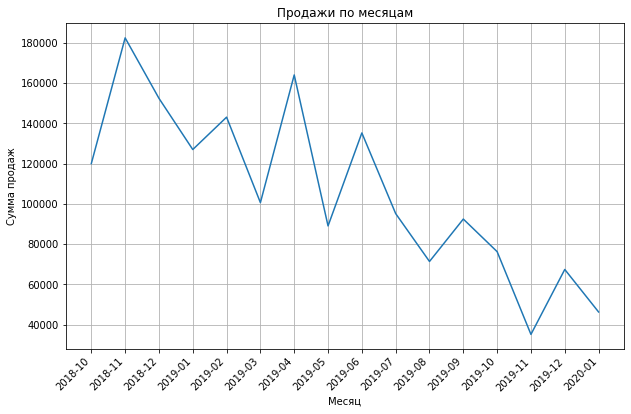

In [49]:
best_monthly_sales = best_data.groupby(best_data['date'].dt.to_period('M'))['total_price'].sum()
best_monthly_sales.index = best_monthly_sales.index.astype(str)


plt.plot(best_monthly_sales.index, best_monthly_sales.values)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.title('Продажи по месяцам')

plt.show()

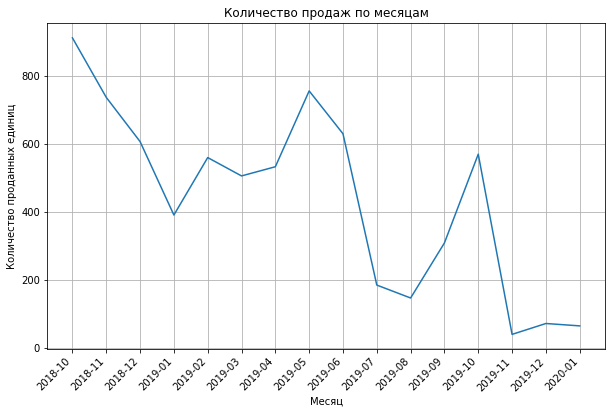

In [50]:
best_monthly_counts = best_data.groupby(best_data['date'].dt.to_period('M'))['quantity'].sum()
best_monthly_counts.index = best_monthly_sales.index.astype(str)


plt.plot(best_monthly_counts.index, best_monthly_counts.values)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.xlabel('Месяц')
plt.ylabel('Количество проданных единиц')
plt.title('Количество продаж по месяцам')

plt.show()

Построив два графика, показывающих динамику продаж лучших товаров (из А-А групп), мы увидели интересующую нас закономерность. Последние два месяца объем количества проданных товаров из числа лучших оказались на отметке около нуля. Самым разумным предположением может служить то, что товар либо закончился на складах, либо по какой-то причине перестал закупаться отделом закупок. Как бы то ни было, исчезновение из ассортимента товаров, показывающих самые высокие продажи как в денежном, так и в количественном отношении, обрушило продажи интернет-магазина.

### Анализ числа заказов

#### по месяцам

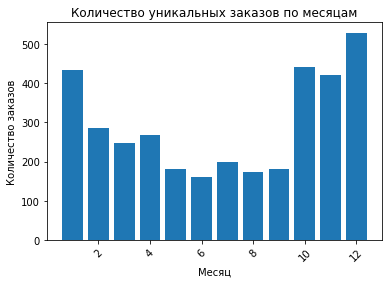

In [51]:
monthly_orders = data.groupby('month')['order_id'].nunique()
plt.bar(monthly_orders.index, monthly_orders.values)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество уникальных заказов по месяцам')
plt.xticks(rotation=45)

plt.show()

Сезонность, прослеживаемая на диаграмме на первый взгляд, на самом деле не соответствует действительности, поскольку данные содержат временной промежуток с октября 2018 по январь 2020,то есть представляют данные за две зимы и лишь одно лето. Корректнее было бы взглянуть на данные за полный 2019 год.

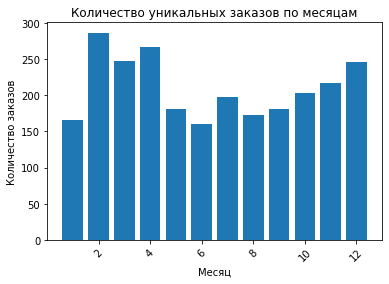

In [52]:
orders_2019 = data.query('date.dt.year == 2019').groupby('month')['order_id'].nunique()
plt.bar(orders_2019.index, orders_2019.values)

plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество уникальных заказов по месяцам')
plt.xticks(rotation=45)

plt.show()

Теперь сезонность уже не кажется настолько очевидной. Сложно выделить однозначную закономерность, хотя и видно, что больше всего заказов приходится с февраля по апрель, а летом количество заказов падает, хотя и не сильно.

#### по часам

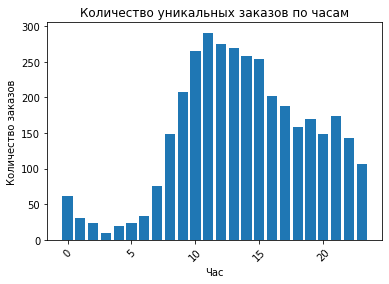

In [53]:
hour_orders = data.groupby('hour')['order_id'].nunique()
plt.bar(hour_orders.index, hour_orders.values)

plt.xlabel('Час')
plt.ylabel('Количество заказов')
plt.title('Количество уникальных заказов по часам')
plt.xticks(rotation=45)

plt.show()

На графике мы видим, что пик количества заказов приходится на период с 10 до 15 часов, после чего идет на спад. В период с полуночи до семи утра число заказов крайне мало.

### Проверка статистических гипотез

#### Проверка сезонности

Вопрос сезонности остается не до конца решенным, поэтому мы попробуем проверить данные на статистическую значимость различий между холодным временем года (октябрь-март) и теплым (апрель-сентябрь). Из-за несовершенности временного периода наших данных, для чистоты эксперимента мы возьмем данные с октября 2018 по март 2019 для первого периода и с апреля по сентябрь 2019 для второго \
В качестве **нулевой гипотезы** предположим, что продажи в этих двух периодах равны \
Таким образом, **альтернативная гипотеза** заключается в том, что периоды не равны между собой

In [54]:
sales_cold = data.query('(date.dt.year == 2018) or (date.dt.year == 2019 and date.dt.month <= 3)')['total_price']
sales_warm = data.query('(date.dt.year == 2019) and (date.dt.month <= 9) and (date.dt.month >= 4)')['total_price']

In [55]:
t_statistic, p_value = ttest_ind(sales_cold, sales_warm, equal_var=False)
alpha = 0.05
print(f"Значение t-статистики:", t_statistic)
print(f"p-значение:", p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Значение t-статистики: 5.614727328982241
p-значение: 2.0952650609601284e-08
Отвергаем нулевую гипотезу


Значение значимости различий оказалось ниже критической отметки, поэтому мы можем окончательно убедиться в существовании сезонности, предположенной нами ранее

#### Проверка статистического равенства стоимости товаров двух крупнейших категорий

В качестве второй гипотезы мы решили сравнить стоимости товаров в категориях "Хоз товары" и "Бытовые приборы". Эти две категории принесли компании наибольшую прибыль, так что нам было бы интересно узнать, равны ли статистически стоимости товаров в этих категориях. \
**Нулевой гипотезой** примем равенство стоимостей товаров этих категорий \
**Альтернативной гипотезой** станет статистическое различие стоимостей

In [56]:
hoz_goods = data.query('category == "Хоз товары"')['price']
home_goods = data.query('category == "Бытовые приборы"')['price']

In [57]:
t_statistic, p_value = ttest_ind(hoz_goods, home_goods, equal_var=False)
alpha = 0.05
print(f"Значение t-статистики:", t_statistic)
print(f"p-значение:", p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Значение t-статистики: -1.1899262015938181
p-значение: 0.2342884404561877
Не получилось отвергнуть нулевую гипотезу


Проведенный тест показал нам, что критически значимой статистической разницы между стоимостями товаров этих двух категорий нет

#### Проверка корреляции между количеством товара в заказе и его ценой

Также мы решили проверить гипотезу о том, что существует закономерность между количеством товара в заказе и его стоимостью. Для проверки этой гипотезы воспользуемся методом расчета коэффициента корреляции Спирмена. Положительное значение коэффициента корреляции будет свидетельствовать о том, что с ростом цены товара растет количество таких позиций в заказе. При отрицательном значении наоборот. Если значение окажется около нуля, то видимая корреляция отсутствует.

In [58]:
corr_dara = data[['quantity', 'price']]

# Рассчет коэффициента корреляции Спирмена
correlation = corr_dara['quantity'].corr(corr_dara['price'], method='spearman')

print(f"Коэффициент корреляции Спирмена: {correlation.round(2)}")

Коэффициент корреляции Спирмена: -0.26


Коэффициент корреляции Спирмена оказался равен -0.26, что свидетельствует о несильной, но существующей зависимости - с ростом цены товара уменьшается количество такого товара в заказе

# Вывод

В проведенном исследовании мы достигли всех поставленных задач:
1) *Проанализировали продажи магазина \
2) Изучили товарный ассортимент \
3) Провели АВС-анализ и выделили лучшие и перспективные товары \
4) Проанализировали количество заказов по месяцам и часам \
5) Проверили несколько статистических гипотез* \
\
Резюмируя итоги исследования, мы можем сделать следующие **выводы**: 

1) Продажи магазина стремительно падают последние полгода, хотя количество заказов растет. Дело в падении среднего чека практически в два раза из-за отсутсвия в ассортименте товаров, обеспечивающих ранее магазину большую долю выручке. Речь о товарах, которые мы определили в качестве лидеров по обоим АВС-анализам и присвоили им группу А-А. Продажи товаров этой группы особенно в последние два месяца стремятся к нулю. \
2) С помощью двойного АВС-анализа мы определили три группы товаров: лучшие (упомянутая выше А-А группа), перспективные (куда вошли А-В, А-С и В-А группы) и все остальные, которых можно идентифицировать как дополнительный ассортимент и который нуждается в контроле и, возможно, чистке \
3) Исследовав сезонность с помощью помесячной диаграммы и проверки статистической гипотезы, мы убедились, что в холодное время года (с октября по март) заказов действительно больше, чем в теплое (с апреля по сентябрь) \
4) Мы также нашли закономерность между количеством товара в заказе и его ценой с помощью нахождения коэффициента корреляции Спирмена. Результаты свидетельствуют о несильной, но существующей зависимости - с ростом цены товара уменьшается количество такого товара в заказе. Эти данные должны учитываться при расчете прогнозируемого количества позиций в чеке и среднего чека

Ссылка на презентацию: <https://drive.google.com/file/d/1yGDR8lnFjbZVB5YOe9mastltwcM3ohhk/view?usp=sharing>